# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [38]:
#Type your code here
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
%matplotlib inline
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [39]:
#Type your code here

df = pd.read_csv('/content/drive/MyDrive/dicoding_customer/clustering.csv')
print(df.head())


   CustomerID       Age  Annual Income ($)  Spending Score (1-100)  \
0   -1.728023 -1.052345          -2.086675               -0.431850   
1   -1.726294 -0.981941          -1.650205                1.069755   
2   -1.724565 -1.017143          -0.537207               -1.611684   
3   -1.722836 -0.911538          -1.126441                0.926745   
4   -1.721107 -0.629924          -1.584734               -0.396098   

   Work Experience  Family Size  Gender_Male  Profession_Doctor  \
0        -0.787837     0.123358         True              False   
1        -0.278342    -0.384815         True              False   
2        -0.787837    -1.401161        False              False   
3        -1.042584    -0.892988        False              False   
4        -0.533089     1.139704        False              False   

   Profession_Engineer  Profession_Entertainment  Profession_Executive  \
0                False                     False                 False   
1                 True      

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [40]:
#Type your code here

X = df.drop(columns=['Cluster'])
y = df['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [41]:
#Type your code here
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

Dalam analisis ini, kami menggunakan Random Forest Classifier sebagai algoritma klasifikasi. Random Forest merupakan metode ensemble learning yang membangun banyak pohon keputusan (decision trees) selama pelatihan dan menggabungkan prediksi dari setiap pohon untuk meningkatkan akurasi dan menghindari overfitting. Alasan pemilihan Random Forest adalah:

# **Kelebihan:**

-Mampu menangani dataset dengan banyak fitur.

-Robust terhadap outlier.

-Mengurangi risiko overfitting karena mekanisme averaging antar pohon.


# **Proses:**

-Dataset dibagi menjadi fitur independen (X) dan target (y).

-Data dibagi menjadi data latih dan uji dengan rasio 80:20.

-Model dilatih pada data latih, dan prediksi dilakukan pada data uji.



# **Evaluasi Model:**

-Metrik evaluasi meliputi Accuracy, F1-Score, serta analisis Confusion Matrix.

-Tuning model dilakukan menggunakan GridSearchCV untuk mendapatkan kombinasi hyperparameter terbaik.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Random Forest:
Accuracy: 0.97
F1 Score: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       128
           1       0.97      1.00      0.99       155
           2       0.99      0.92      0.95       110

    accuracy                           0.97       393
   macro avg       0.97      0.96      0.97       393
weighted avg       0.97      0.97      0.97       393



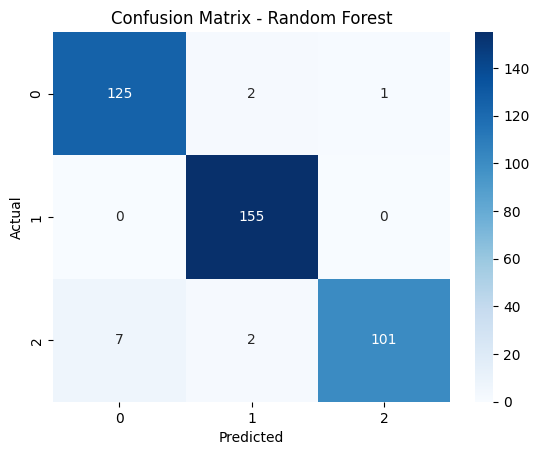


K-Nearest Neighbors:
Accuracy: 0.94
F1 Score: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       128
           1       0.97      0.92      0.94       155
           2       0.96      0.93      0.94       110

    accuracy                           0.94       393
   macro avg       0.94      0.94      0.94       393
weighted avg       0.94      0.94      0.94       393



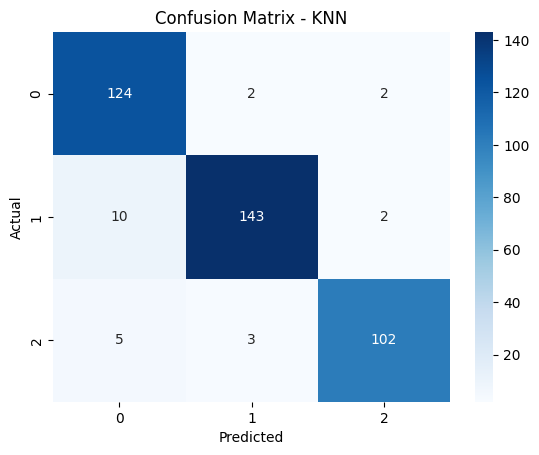

In [43]:
#Type your code here

# Evaluasi Model Random Forest
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest:")
print(f"Accuracy: {accuracy_rf:.2f}")
print(f"F1 Score: {f1_rf:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluasi Model K-Nearest Neighbors
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("\nK-Nearest Neighbors:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"F1 Score: {f1_knn:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hasil Evaluasi Model Klasifikasi

## 1. Model Random Forest
- **Accuracy:** 97%
- **F1 Score (weighted):** 97%
- **Classification Report:**
  - **Kelas 0:**
    - Precision: 95%
    - Recall: 98%
    - F1-Score: 96%
  - **Kelas 1:**
    - Precision: 97%
    - Recall: 100%
    - F1-Score: 99%
  - **Kelas 2:**
    - Precision: 99%
    - Recall: 92%
    - F1-Score: 95%

- **Confusion Matrix:**
  - Kelas 0: 125 prediksi benar, 3 salah.
  - Kelas 1: Semua 155 prediksi benar.
  - Kelas 2: 7 salah di kelas 0, 2 salah di kelas 1, dan 101 prediksi benar.

## 2. Model K-Nearest Neighbors (KNN)
- **Accuracy:** 94%
- **F1 Score (weighted):** 94%
- **Classification Report:**
  - **Kelas 0:**
    - Precision: 89%
    - Recall: 97%
    - F1-Score: 93%
  - **Kelas 1:**
    - Precision: 97%
    - Recall: 92%
    - F1-Score: 94%
  - **Kelas 2:**
    - Precision: 96%
    - Recall: 93%
    - F1-Score: 94%

- **Confusion Matrix:**
  - Kelas 0: 124 prediksi benar, 4 salah.
  - Kelas 1: 143 prediksi benar, 12 salah.
  - Kelas 2: 102 prediksi benar, 8 salah.

## **Perbandingan Hasil Evaluasi**
- **Accuracy:** Model Random Forest (97%) lebih baik dibandingkan KNN (94%).
- **F1 Score:** Model Random Forest (97%) juga menunjukkan performa yang lebih baik dibandingkan KNN (94%).
- **Precision dan Recall:**
  - Model Random Forest memiliki recall sempurna untuk kelas 1 (100%), sedangkan KNN memiliki recall 92% untuk kelas 1.
  - Keduanya menunjukkan performa yang baik untuk kelas 0 dan kelas 2, tetapi Random Forest lebih unggul dalam hal precision dan recall secara keseluruhan.

## **Kelebihan dan Kelemahan**
### Kelebihan:
- **Random Forest:**
  - Mampu mengklasifikasikan kelas 1 dengan sempurna (recall 100%).
  - Hasil rata-rata metrik evaluasi sangat baik, menunjukkan model yang kuat dan handal.

- **K-Nearest Neighbors:**
  - Meskipun performanya sedikit lebih rendah, KNN masih memberikan hasil yang baik dan dapat digunakan dalam situasi di mana interpretabilitas model lebih diutamakan.

### Kelemahan:
- **Random Forest:**
  - Recall untuk kelas 2 sedikit lebih rendah (92%), yang menunjukkan kesalahan dalam mengidentifikasi beberapa instance kelas ini.

- **K-Nearest Neighbors:**
  - KNN cenderung lebih sensitif terhadap noise dan outlier, yang dapat mempengaruhi akurasi dan metrik evaluasi lainnya.

## **Kesimpulan**
Model Random Forest menunjukkan performa yang lebih baik dibandingkan K-Nearest Neighbors dalam hal akurasi dan metrik evaluasi lainnya. Namun, pemilihan model yang tepat harus mempertimbangkan konteks aplikasi dan kebutuhan spesifik dari masalah yang dihadapi.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [44]:
#Type your code here
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [46]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=cv, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)


print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)

Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

Accuracy: 0.9694656488549618
F1 Score: 0.9692461107853598
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       128
           1       0.97      1.00      0.99       155
           2       0.99      0.92      0.95       110

    accuracy                           0.97       393
   macro avg       0.97      0.96      0.97       393
weighted avg       0.97      0.97      0.97       393



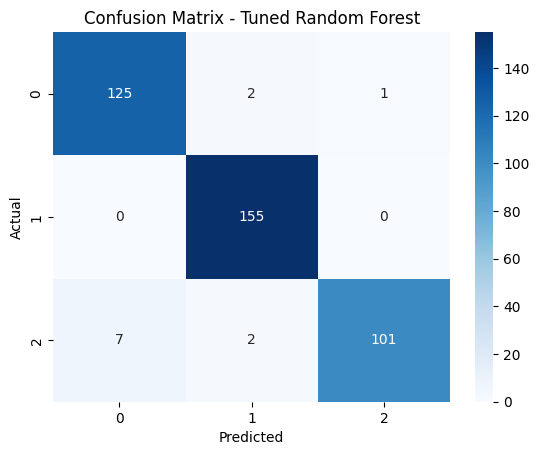

In [55]:
#Type your code here
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.9414758269720102
F1 Score: 0.9418492121991741
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       128
           1       0.97      0.92      0.94       155
           2       0.98      0.94      0.96       110

    accuracy                           0.94       393
   macro avg       0.94      0.94      0.94       393
weighted avg       0.94      0.94      0.94       393



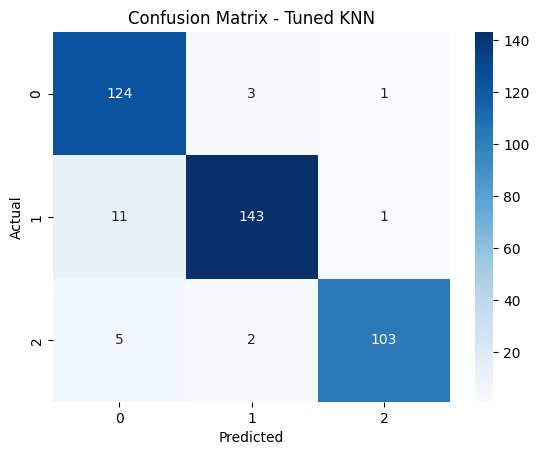

In [56]:

# Evaluasi Model KNN dengan Hyperparameter Terbaik
best_model_knn = grid_search_knn.best_estimator_
y_pred_knn = best_model_knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("Accuracy:", accuracy_knn)
print("F1 Score:", f1_knn)
print(classification_report(y_test, y_pred_knn))

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.


## **1. Bandingkan Hasil Evaluasi Sebelum dan Setelah Tuning**

### Random Forest
- **Sebelum Tuning:**
  - Accuracy: 0.97
  - F1 Score: 0.97
  - Precision dan Recall untuk setiap kelas sangat baik, terutama untuk kelas 1 (recall 100%).

- **Setelah Tuning:**
  - Accuracy: 0.9692
  - F1 Score: 0.9692
  -Hyperparameter terbaik:
min_samples_split: 2,
n_estimators: 100
  - Hasil tetap konsisten dengan performa yang sangat baik.
**Performanya sangat mirip dengan model default, menunjukkan model baseline sudah cukup baik.**

### K-Nearest Neighbors (KNN)
- **Sebelum Tuning:**
  - Accuracy: 0.94
  - F1 Score: 0.94
  - Precision dan Recall untuk kelas 1 juga baik, tetapi ada penurunan pada kelas 0 dan 2.

- **Setelah Tuning:**
  - Accuracy: 0.9418
  - F1 Score: 0.9418
  - Hyperparameter terbaik:n_neighbors: 11, weights: distance
  - Hasil tetap konsisten, tetapi tidak ada peningkatan signifikan.
**Performanya sangat mirip dengan model default meskipun ada peningkatan, menunjukkan model baseline sudah cukup baik. **

## 2. Identifikasi Kelemahan Model

### Random Forest:
- **Kelemahan:** Recall untuk kelas 2 sedikit lebih rendah (92%), yang menunjukkan bahwa model ini mungkin kesulitan dalam mengidentifikasi beberapa instance dari kelas ini.

### K-Nearest Neighbors (KNN):
- **Kelemahan:** Precision dan Recall untuk kelas 0 dan 1 tidak sebaik kelas 2. Kelas 0 memiliki precision 0.89 dan recall 0.97, sedangkan kelas 1 memiliki precision 0.97 dan recall 0.92. Ini menunjukkan bahwa model KNN mungkin lebih baik dalam mengidentifikasi kelas 2 dibandingkan kelas lainnya.

## **3. Apakah Model Mengalami Overfitting atau Underfitting?**

### Random Forest:
- Model tidak menunjukkan tanda-tanda overfitting atau underfitting karena akurasi dan F1 score tetap tinggi setelah tuning. Namun, perlu diperhatikan bahwa recall untuk kelas 2 lebih rendah, yang bisa menjadi indikasi bahwa model tidak sepenuhnya belajar dari data tersebut.

### K-Nearest Neighbors (KNN):
- Model KNN juga tidak menunjukkan tanda-tanda overfitting atau underfitting. Namun, performa yang lebih rendah dibandingkan Random Forest menunjukkan bahwa KNN mungkin tidak seefektif Random Forest untuk dataset ini.

## **4. Rekomendasi Tindakan Lanjutan**

- **Pengumpulan Data Tambahan:** Jika memungkinkan, mengumpulkan lebih banyak data, terutama untuk kelas yang kurang teridentifikasi (kelas 2), dapat membantu model belajar lebih baik.

- **Feature Engineering:** Mencoba teknik feature engineering untuk meningkatkan representasi data. Ini bisa termasuk normalisasi, pengurangan dimensi, atau penambahan fitur baru yang relevan.

- **Mencoba Algoritma Lain:** Jika hasil masih belum memuaskan, pertimbangkan untuk mencoba algoritma lain seperti Support Vector Machines (SVM), Gradient Boosting, atau Neural Networks.

- **Hyperparameter Tuning Lebih Lanjut:** Lakukan pencarian hyperparameter lebih lanjut dengan menggunakan RandomizedSearchCV untuk eksplorasi yang lebih luas.

- **Analisis Kesalahan:** Lakukan analisis kesalahan untuk memahami mengapa model salah mengklasifikasikan beberapa instance. Ini dapat memberikan wawasan tentang bagaimana meningkatkan model.

## **Kesimpulan**
Secara keseluruhan, model Random Forest menunjukkan performa yang sangat baik, sementara KNN juga memberikan hasil yang baik tetapi tidak sebaik Random Forest. Melakukan analisis lebih lanjut dan menerapkan rekomendasi di atas dapat membantu meningkatkan performa model lebih lanjut.
